In [961]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns

In [962]:
#reading dataset file and showing
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [963]:
# description of data
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [964]:
data_train.describe(include=np.object)

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Stewart, Mr. Albert A",male,347082,B96 B98,S
freq,1,577,7,4,644


In [965]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [966]:
data_train.apply(lambda x: sum(x.isnull()),axis=0)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [967]:
data_test.apply(lambda x: sum(x.isnull()),axis=0)

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [968]:
##Filling the missing data####

In [969]:
data_train["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [970]:
 data_train.Embarked = data_train.Embarked.fillna('S')

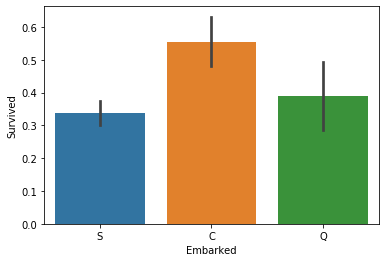

In [971]:
#showhing the graph between Survived and Embarked
sns.barplot(x="Embarked",y="Survived",data=data_train)

In [972]:
data_test.Fare = data_test.Fare.fillna(data_test['Fare'].mean())

In [973]:
data_train.Cabin = data_train.Cabin.fillna('No')
data_test.Cabin = data_test.Cabin.fillna('No')

In [974]:
data_train['Cabin'][data_train['Cabin']!='No']='Yes'
data_test['Cabin'][data_test['Cabin']!='No']='Yes'

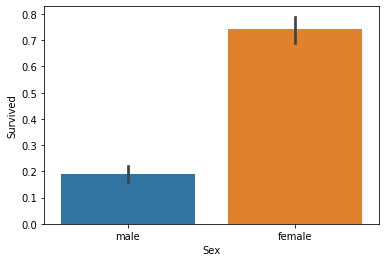

In [975]:
sns.barplot(x="Sex",y="Survived",data=data_train)

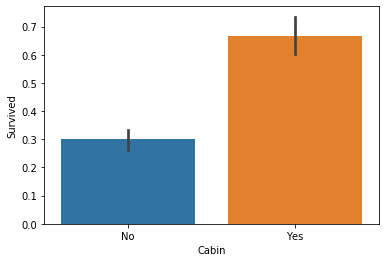

In [976]:
sns.barplot(x="Cabin",y="Survived",data=data_train)

In [977]:
feature_col = ['Pclass','Sex','Embarked','SibSp','Parch']
#feature_col_test = ['Pclass','Sex','Embarked','SibSp','Parch']
data_train['Age'] = data_train['Age'].fillna(data_train.groupby(feature_col)['Age'].transform('mean'))
data_test['Age'] = data_test['Age'].fillna(data_test.groupby(feature_col)['Age'].transform('mean'))

In [978]:
data_train['Age'] = data_train['Age'].fillna(data_train['Age'].mean())
data_test['Age'] = data_test['Age'].fillna(data_test['Age'].mean())

In [979]:
data_train.apply(lambda x: sum(x.isnull()),axis=0)

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [980]:
data_test.apply(lambda x: sum(x.isnull()),axis=0)

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [981]:
data_train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0000,0,0,211536,13.00,No,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0000,0,0,112053,30.00,Yes,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.7519,1,2,W./C. 6607,23.45,No,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0000,0,0,111369,30.00,Yes,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0000,0,0,370376,7.75,No,Q


In [982]:
# encoding object type data
from sklearn.preprocessing import LabelEncoder
var_mod = ['Sex','Cabin','Embarked']
le = LabelEncoder()
for i in var_mod:
    data_train[i] = le.fit_transform(data_train[i])
    data_test[i] = le.fit_transform(data_test[i])
data_train.head() 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,1,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,1,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0,2


In [983]:
#feature selection for model traning
X_train = data_train[['Pclass','Sex','Age','SibSp','Parch','Cabin','Embarked']]
y_train = data_train['Survived']

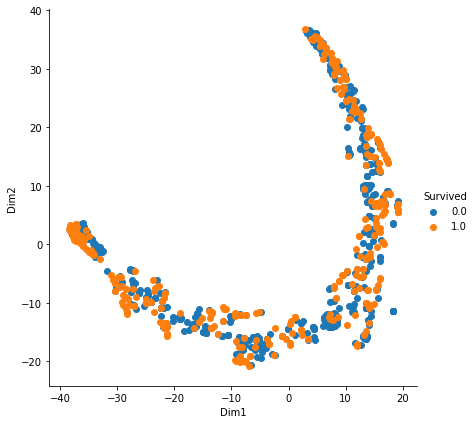

In [984]:
#visulize the dataset 
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
#visualization of data with max two variances using TSNE
#model
model=TSNE(n_components=2,random_state=0,perplexity=50,n_iter=5000)
tsne_data=model.fit_transform(X_train)
#by default perplextiy=30,itration=1000 and learning rate=200

#visiuliaze
tnse_data=np.vstack((tsne_data.T,y_train)).T
tnse_df=pd.DataFrame(data=tnse_data,columns=("Dim1","Dim2","Survived"))
#plotting
sns.FacetGrid(tnse_df,hue="Survived",size=6).map(plt.scatter,"Dim1","Dim2").add_legend()
plt.show()

In [985]:
#applying Pca for getting maximum variance as feature
from sklearn import decomposition
pca= decomposition.PCA()
pca.n_components=6
X_train=pca.fit_transform(X_train)
X_train=np.vstack((X_train.T)).T
X=pd.DataFrame(data=X_train,columns=("1st","2nd","3rd","4th","5th","6th"))
y = y_train

In [986]:
#### LOGISTIC REGRESSION CLASSIFIER ######

In [987]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
Lgclassifier = LogisticRegression(random_state = 0)

In [988]:
from sklearn.model_selection import cross_val_score
#using k-fold cross validation
scores = cross_val_score(Lgclassifier, X, y, cv=5)
scores

array([0.81005587, 0.79213483, 0.80337079, 0.78651685, 0.8258427 ])

In [989]:
print("Cross_val_Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Cross_val_Accuracy: 0.80 (+/- 0.03)


In [990]:
#classifier.fit(X_df, y_df)
#y_pred = classifier.predict(X_test)

In [991]:
#### KNN CLASSIFIER ######

In [992]:
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
Knclassifier = KNeighborsClassifier(n_neighbors =5, metric = 'minkowski', p = 2)

In [993]:
scores = cross_val_score(Knclassifier, X, y, cv=5)
scores

array([0.70391061, 0.76404494, 0.76404494, 0.81460674, 0.7752809 ])

In [994]:
print("Cross_val_Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Cross_val_Accuracy: 0.76 (+/- 0.07)


In [995]:
#### SVC CLASSIFIER (with poloynomial degree 3)######

In [996]:
#cubic svm
from sklearn.svm import SVC
Svcclassifier = SVC(kernel = 'poly', degree=3, random_state = 0)

In [997]:
scores = cross_val_score(Svcclassifier, X, y, cv=5)
scores

array([0.68156425, 0.64606742, 0.68539326, 0.66292135, 0.66292135])

In [998]:
print("Cross_val_Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Cross_val_Accuracy: 0.67 (+/- 0.03)


In [999]:
#### NAIVE BEYES CLASSIFIER ######

In [1000]:
from sklearn.naive_bayes import GaussianNB
Nbclassifier = GaussianNB()

In [1001]:
scores = cross_val_score(Nbclassifier, X, y, cv=5)
scores

array([0.77094972, 0.76404494, 0.80337079, 0.80337079, 0.80337079])

In [1002]:
print("Cross_val_Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Cross_val_Accuracy: 0.79 (+/- 0.04)


In [1003]:
#### DECISION TREE CLASSIFIER ######

In [1004]:
from sklearn.tree import DecisionTreeClassifier
Dtclassifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)

In [1005]:
scores = cross_val_score(Dtclassifier, X, y, cv=5)
scores

array([0.72067039, 0.80337079, 0.78089888, 0.75842697, 0.78651685])

In [1006]:
print("Cross_val_Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Cross_val_Accuracy: 0.77 (+/- 0.06)


In [1007]:
#### RANDOM FOREST CLASSIFIER ######

In [1008]:
from sklearn.ensemble import RandomForestClassifier
Rfclassifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)

In [1009]:
scores = cross_val_score(Rfclassifier, X, y, cv=5)
scores

array([0.74860335, 0.8258427 , 0.78651685, 0.75842697, 0.8258427 ])

In [1010]:
print("Cross_val_Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Cross_val_Accuracy: 0.79 (+/- 0.07)


In [1011]:
#### STOCHASTIC GRADIENT DESCENT CLASSIFIER ######

In [1012]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
Sgdclassifier = make_pipeline(StandardScaler(),SGDClassifier(max_iter=1000, tol=1e-3))

In [1013]:
scores = cross_val_score(Sgdclassifier, X, y, cv=5)
scores

array([0.75977654, 0.75280899, 0.78651685, 0.75842697, 0.82022472])

In [1014]:
print("Cross_val_Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Cross_val_Accuracy: 0.78 (+/- 0.05)


In [1015]:
#### GRADIENT BOSSTING CLASSIFIER ######

In [1016]:
from sklearn.ensemble import GradientBoostingClassifier
Gbclassifier = GradientBoostingClassifier(random_state=0)

In [1017]:
scores = cross_val_score(Gbclassifier, X, y, cv=5)
scores

array([0.77653631, 0.83146067, 0.80898876, 0.79213483, 0.83146067])

In [1018]:
print("Cross_val_Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Cross_val_Accuracy: 0.81 (+/- 0.04)


In [1019]:
###stacked classifier #####

In [1020]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
estimators = [('RF',Rfclassifier),('GB',Gbclassifier ),('LR',Lgclassifier)]
clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

In [1021]:
scores = cross_val_score(clf, X, y, cv=5)
scores

array([0.79329609, 0.8258427 , 0.83707865, 0.80898876, 0.8258427 ])

In [1022]:
print("Cross_val_Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Cross_val_Accuracy: 0.82 (+/- 0.03)
